In [31]:
import yfinance as yf

# BIST 100 endeksi (örnek sembol)
bist100 = yf.Ticker("XU100.IS")

# Tarihsel veri çekme
df = bist100.history()
print(df.head())


                                  Open         High          Low        Close  \
Date                                                                            
2024-10-21 00:00:00+03:00  8798.299805  8807.900391  8642.200195  8654.400391   
2024-10-22 00:00:00+03:00  8677.799805  8913.500000  8676.799805  8838.599609   
2024-10-23 00:00:00+03:00  8853.799805  8867.099609  8664.000000  8714.700195   
2024-10-24 00:00:00+03:00  8779.099609  8920.200195  8779.099609  8872.900391   
2024-10-25 00:00:00+03:00  8843.599609  8921.599609  8782.599609  8908.500000   

                               Volume  Dividends  Stock Splits  
Date                                                            
2024-10-21 00:00:00+03:00  2130735600        0.0           0.0  
2024-10-22 00:00:00+03:00  2881678500        0.0           0.0  
2024-10-23 00:00:00+03:00  2952799500        0.0           0.0  
2024-10-24 00:00:00+03:00  2020807300        0.0           0.0  
2024-10-25 00:00:00+03:00  2001781600     

In [32]:
import yfinance as yf

# BIST 100 endeksi
bist100 = yf.Ticker("XU100.IS")

# Tarihsel veri çekme (örneğin 2020'den itibaren)
df = bist100.history(start="2021-01-01", end="2024-11-20")

print(df.head())  # İlk 5 gözlemi yazdır
print(df.tail())  # Son 5 gözlemi yazdır


                                  Open         High          Low        Close  \
Date                                                                            
2021-01-04 00:00:00+03:00  1482.199951  1500.000000  1478.699951  1495.400024   
2021-01-05 00:00:00+03:00  1492.199951  1506.900024  1474.800049  1489.599976   
2021-01-06 00:00:00+03:00  1501.599976  1509.500000  1497.099976  1505.400024   
2021-01-07 00:00:00+03:00  1511.599976  1522.699951  1505.699951  1522.199951   
2021-01-08 00:00:00+03:00  1526.500000  1542.800049  1519.800049  1540.599976   

                               Volume  Dividends  Stock Splits  
Date                                                            
2021-01-04 00:00:00+03:00  5172334300        0.0           0.0  
2021-01-05 00:00:00+03:00  6659180300        0.0           0.0  
2021-01-06 00:00:00+03:00  5330873300        0.0           0.0  
2021-01-07 00:00:00+03:00  6175892400        0.0           0.0  
2021-01-08 00:00:00+03:00  5500828100     

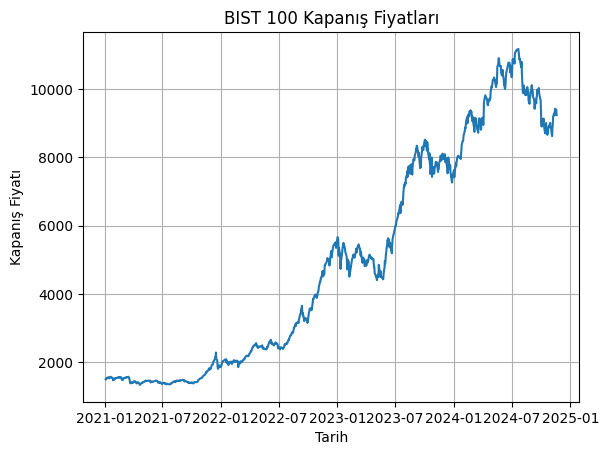

In [12]:
import matplotlib.pyplot as plt

# "Close" sütununu çizin
plt.plot(df.index, df["Close"])
plt.title("BIST 100 Kapanış Fiyatları")
plt.xlabel("Tarih")
plt.ylabel("Kapanış Fiyatı")
plt.grid()
plt.show()


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a target variable: Price increases (1) or decreases (0)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Feature Engineering
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.53


Accuracy: 0.49


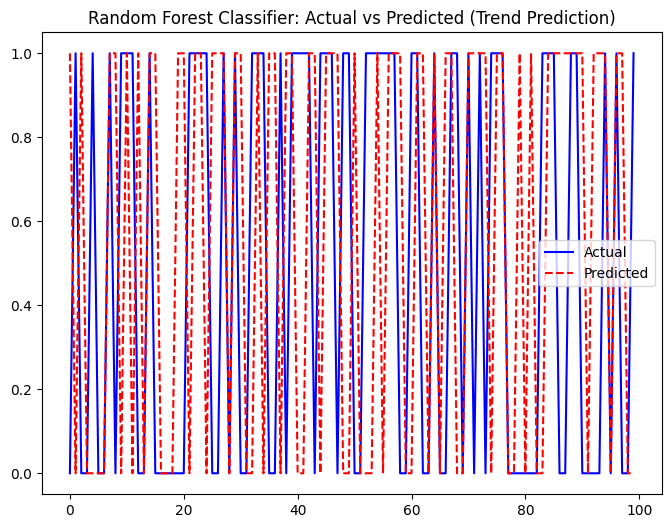

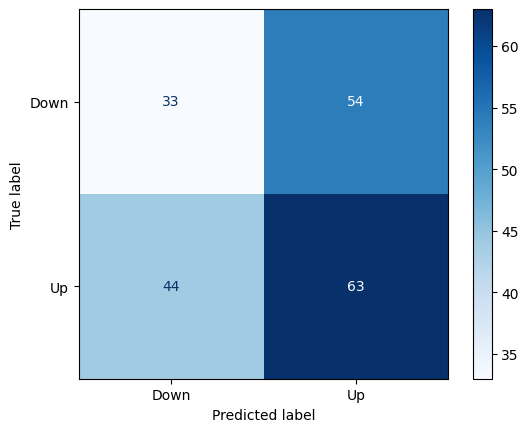

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a target variable: Price increases (1) or decreases (0)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Feature Engineering
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Target']

# Train-test split (using all data, no normalization)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Predicted vs. Actual (Plotting the first 100 instances for visualization)
plt.figure(figsize=(8, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred[:100], label="Predicted", color="red", linestyle="--")
plt.title("Random Forest Classifier: Actual vs Predicted (Trend Prediction)")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
disp.plot(cmap="Blues")
plt.show()


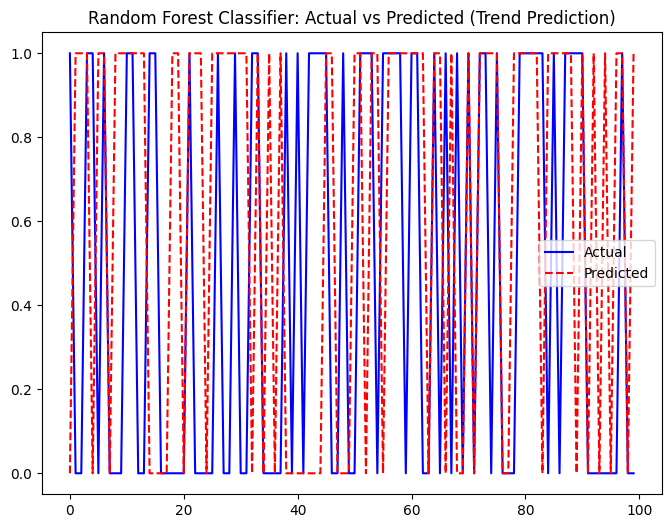

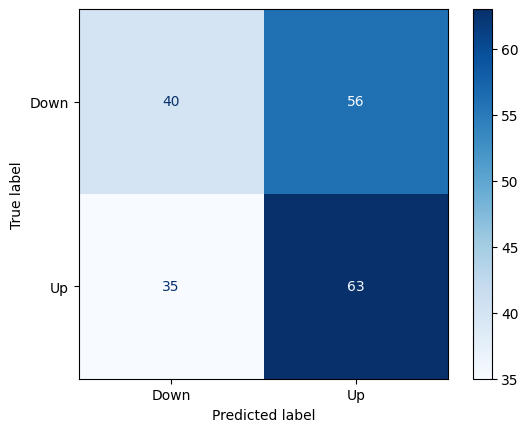

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred[:100], label="Predicted", color="red", linestyle="--")
plt.title("Random Forest Classifier: Actual vs Predicted (Trend Prediction)")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
disp.plot(cmap="Blues")
plt.show()


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

# Plot Predicted vs. Actual for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred[:100], label="Predicted", color="red", linestyle="--")
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


Mean Squared Error: 1292.36


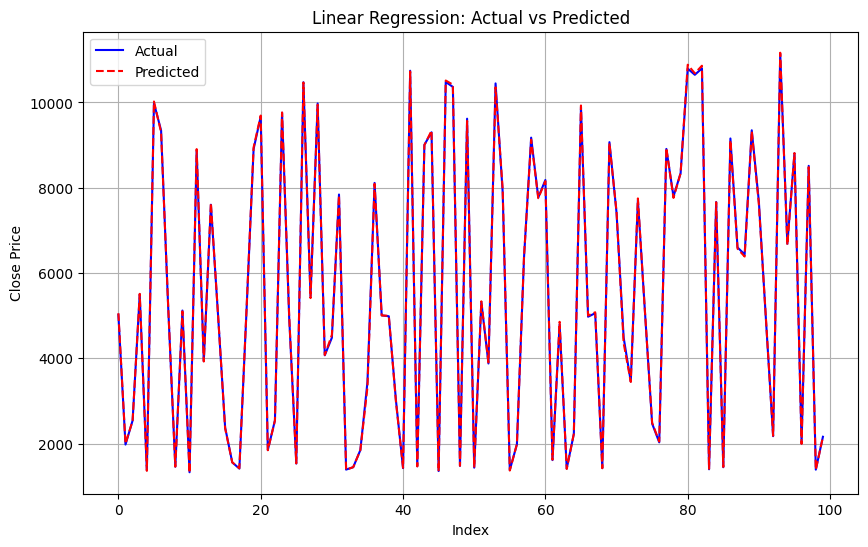

In [18]:
# Plot Predicted vs. Actual for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred[:100], label="Predicted", color="red", linestyle="--")
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()



Mean Squared Error: 8791.37


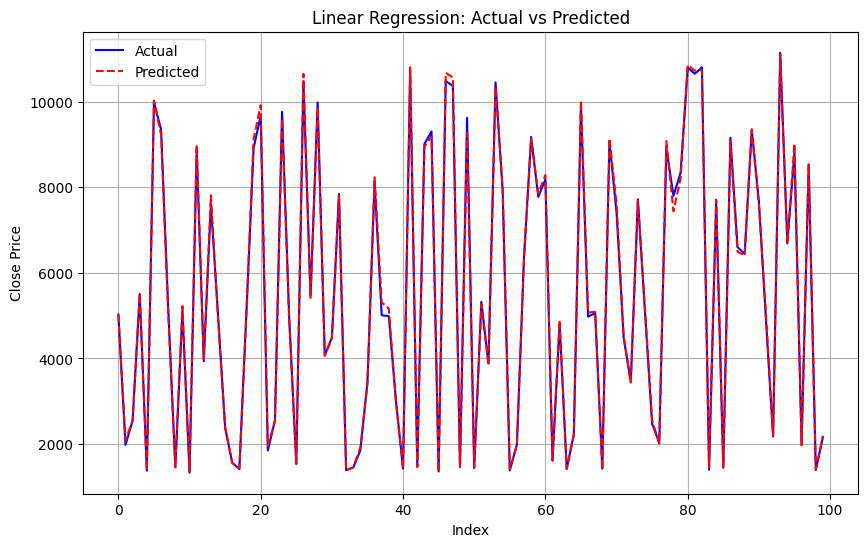

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Tek değişkenli regresyon için 'Open' özelliği seçildi
X = df[['Open']]  # Yalnızca 'Open' fiyatını kullanıyoruz
y = df['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

# Plot Predicted vs. Actual for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred[:100], label="Predicted", color="red", linestyle="--")
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


Mean Squared Error: 11415.41


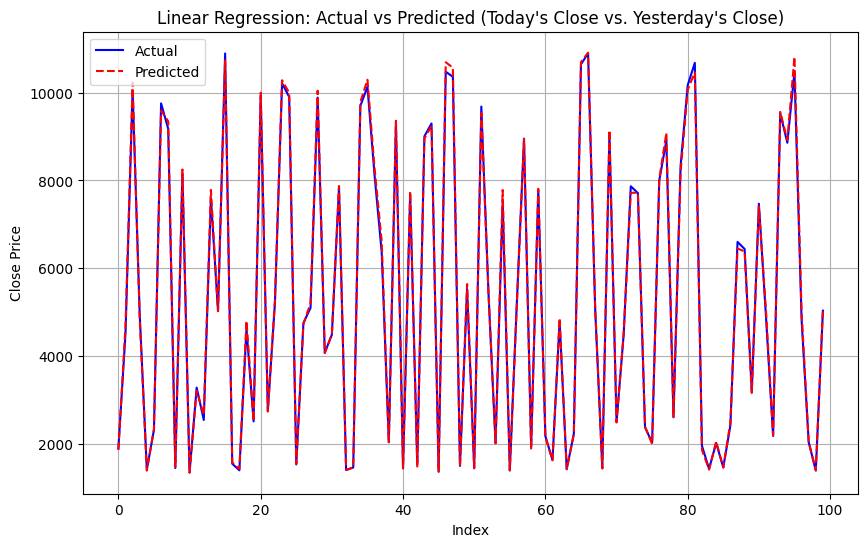

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Bağımlı değişken: Bugünün kapanış fiyatı, bağımsız değişken: Dün kapanış fiyatı
df['Previous_Close'] = df['Close'].shift(1)  # Dün kapanış fiyatı (bağımsız değişken)
df = df.dropna()  # NaN değerlerini kaldırıyoruz, çünkü shift ile oluşan ilk satırda NaN olacak

# Bağımsız ve bağımlı değişkenler
X = df[['Previous_Close']]  # Dün kapanış fiyatı
y = df['Close']  # Bugün kapanış fiyatı

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

# Plot Predicted vs. Actual for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred[:100], label="Predicted", color="red", linestyle="--")
plt.title("Linear Regression: Actual vs Predicted (Today's Close vs. Yesterday's Close)")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(scaled_data, seq_length)

# Train-test split
X_train, X_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):]
y_train, y_test = y[:int(0.8*len(y))], y[int(0.8*len(y)):]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predictions
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)


Epoch 1/10


2024-11-20 00:26:44.540355: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-20 00:26:44.540380: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-20 00:26:44.540385: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-20 00:26:44.540416: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-20 00:26:44.540425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/miniconda3/envs/TFmacOS/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0427 - val_loss: 0.0292
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.7102e-04 - val_loss: 0.0022
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.7521e-04 - val_loss: 0.0018
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3857e-04 - val_loss: 0.0022
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.0584e-04 - val_loss: 0.0015
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.3664e-04 - val_loss: 0.0021
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.2380e-04 - val_loss: 0.0016
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.9334e-04 - val_loss: 0.0014
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6793e-04 - val_loss: 0.0012
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


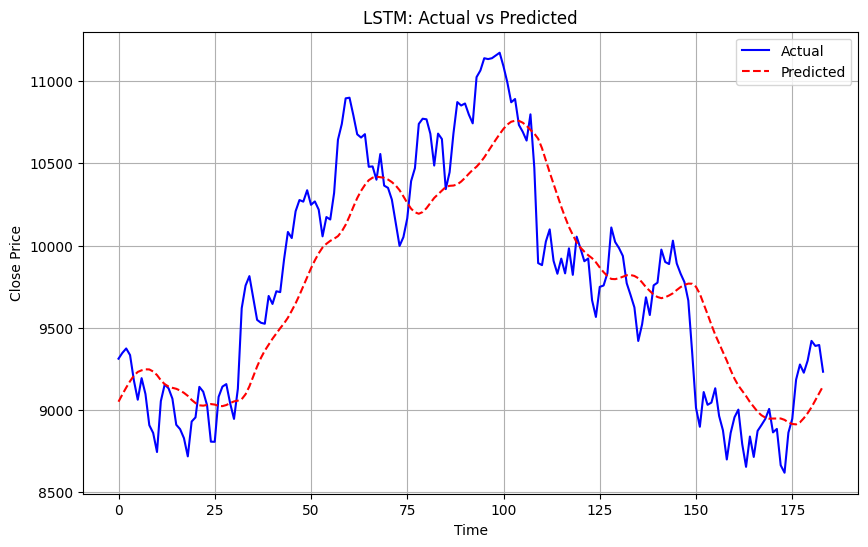

In [20]:
# Predicted vs. Real Values for LSTM
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test), label="Actual", color="blue")
plt.plot(predicted_prices, label="Predicted", color="red", linestyle="--")
plt.title("LSTM: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


In [21]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Build CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(seq_length, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predictions
cnn_predictions = cnn_model.predict(X_test)


Epoch 1/10


/opt/miniconda3/envs/TFmacOS/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0545 - val_loss: 0.0060
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0079
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7995e-04 - val_loss: 0.0020
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.5956e-04 - val_loss: 0.0024
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0288e-04 - val_loss: 0.0023
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4317e-04 - val_loss: 0.0031
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1268e-04 - val_loss: 0.0024
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8119e-04 - val_loss: 0.0017
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0943e-04 - val_loss: 0.0014
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


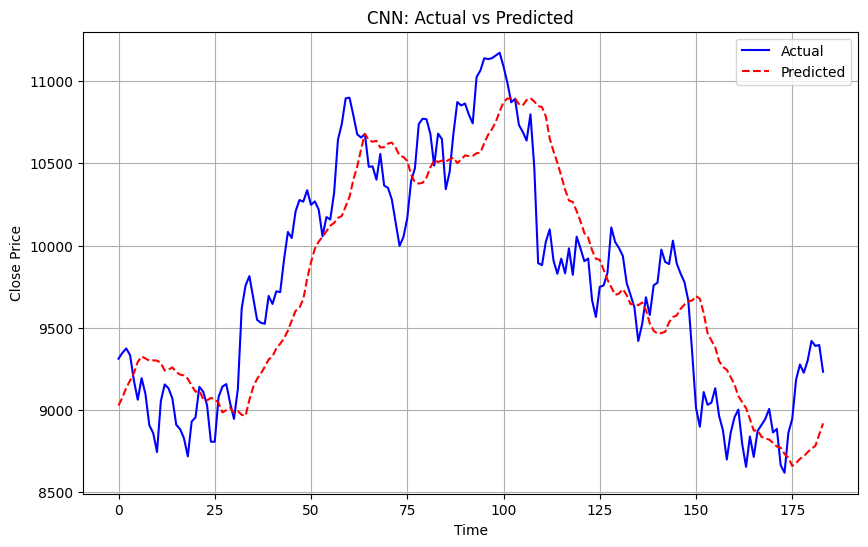

In [22]:
# Predicted vs. Real Values for CNN
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test), label="Actual", color="blue")
plt.plot(scaler.inverse_transform(cnn_predictions), label="Predicted", color="red", linestyle="--")
plt.title("CNN: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


In [23]:
# Plot Predicted vs. Actual for XGBoost
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred[:100], label="Predicted", color="red", linestyle="--")
plt.title("XGBoost Regressor: Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'values'

<Figure size 1000x600 with 0 Axes>

In [ ]:
import xgboost as xgb

# Train XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg.fit(X_train, y_train)

# Predictions
y_pred = xg_reg.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")


In [26]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (734, 50, 1)
X_test shape: (184, 50, 1)
y_train shape: (734, 1)
y_test shape: (184, 1)


In [27]:
# Reshape the data to 2D
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Ensure y_train and y_test are 1-dimensional
y_train_reshaped = y_train.ravel()  # Flatten the target
y_test_reshaped = y_test.ravel()

# Train XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg.fit(X_train_reshaped, y_train_reshaped)

# Predictions
y_pred = xg_reg.predict(X_test_reshaped)

# Output predictions
print(y_pred)


[0.8047011  0.79979163 0.80078053 0.79964    0.7950187  0.7969458
 0.79433227 0.79505897 0.7974958  0.7899184  0.79382193 0.78317446
 0.7829363  0.78341097 0.78341097 0.7824462  0.78341097 0.78314537
 0.7843073  0.78360516 0.78412086 0.78412086 0.78412086 0.7844198
 0.7844198  0.7843484  0.7843484  0.7843484  0.7843484  0.7843455
 0.78512526 0.7847547  0.78507286 0.78507286 0.78507286 0.78507286
 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286
 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286
 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286
 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286
 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286
 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286
 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286
 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286
 0.78507286 0.78507286 0.78507286 0.78507286 0.78507286 0.7850728

In [28]:
# Plot Predicted vs. Actual for XGBoost
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred[:100], label="Predicted", color="red", linestyle="--")
plt.title("XGBoost Regressor: Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'values'

<Figure size 1000x600 with 0 Axes>

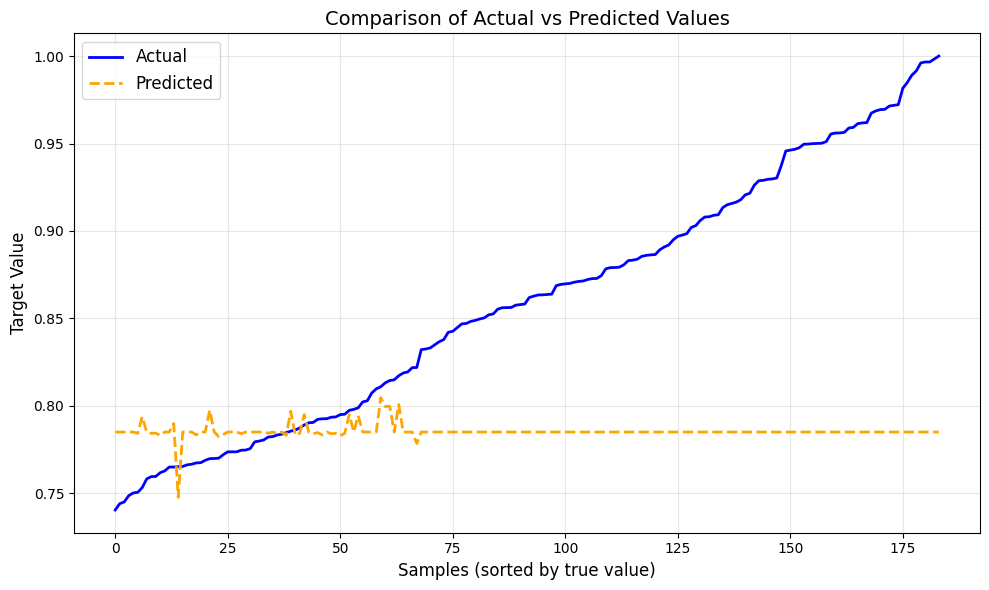

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the predictions vs actual test values
plt.figure(figsize=(10, 6))

# Sort values for a cleaner comparison (optional, if ordering doesn't matter)
sorted_indices = np.argsort(y_test_reshaped)
sorted_y_test = y_test_reshaped[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]

# Plot the actual values
plt.plot(sorted_y_test, label="Actual", color="blue", linewidth=2)

# Plot the predicted values
plt.plot(sorted_y_pred, label="Predicted", color="orange", linestyle="dashed", linewidth=2)

# Add labels, title, and legend
plt.title("Comparison of Actual vs Predicted Values", fontsize=14)
plt.xlabel("Samples (sorted by true value)", fontsize=12)
plt.ylabel("Target Value", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd

# Assuming 'bist100_close' is a pandas Series containing the data
# Example: bist100_close = pd.Series([list_of_close_prices])

# Descriptive statistics
desc_stats = df["Close"].describe()

# Add skewness and kurtosis
desc_stats['skewness'] = df["Close"].skew()
desc_stats['kurtosis'] = df["Close"].kurt()

# Print descriptive statistics
print(desc_stats)


count         968.000000
mean         4981.025717
std          3211.858927
min          1330.500000
25%          1944.774994
50%          4575.500000
75%          8009.499878
max         11172.799805
skewness        0.391236
kurtosis       -1.344255
Name: Close, dtype: float64
